<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

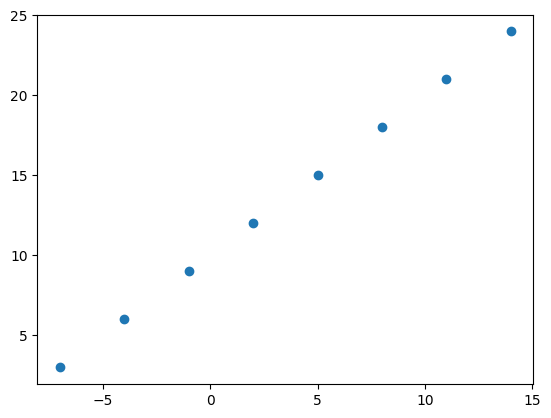

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

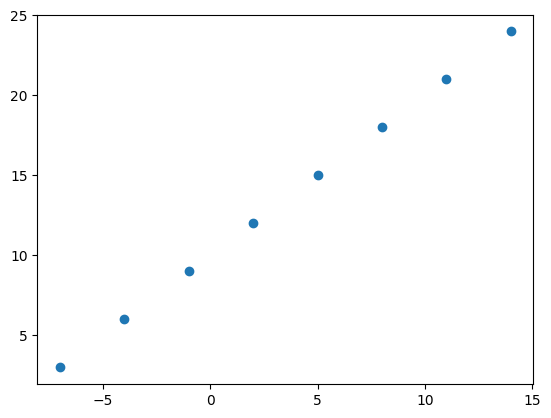

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the
function which tells our model how wrong it is) and the optimizer
(tells our model how to improve the patterns its learning) and
evaluation metrics (what we can use ta interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

In [ ]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 19.0683 - mae: 19.0683
Epoch 2/5
1/1 [==============================] - 0s 34ms/step - loss: 18.3585 - mae: 18.3585
Epoch 3/5
1/1 [==============================] - 0s 57ms/step - loss: 17.7158 - mae: 17.7158
Epoch 4/5
1/1 [==============================] - 0s 27ms/step - loss: 17.1327 - mae: 17.1327
Epoch 5/5
1/1 [==============================] - 0s 28ms/step - loss: 16.6022 - mae: 16.6022


In [ ]:
# Check out X, and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 334ms/step


array([[-10.983653]], dtype=float32)

In [ ]:
y_pred + 18

array([[7.016347]], dtype=float32)

## Improving our model

We can improve our model, by astering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 9.7476 - mae: 9.7476
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6151 - mae: 9.6151
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 9.4826 - mae: 9.4826
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 9.3501 - mae: 9.3501
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 9.2176 - mae: 9.2176
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 9.0851 - mae: 9.0851
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 8.9526 - mae: 8.9526
Epoch 8/100
1/1 [==============================] - 0s 37ms/step - loss: 8.8201 - mae: 8.8201
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 8.6876 - mae: 8.6876
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 8.5551 - mae: 8.5551
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 248ms/step


array([[29.73084]], dtype=float32)

### Create a new model

In [ ]:
# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.6528 - mae: 13.6528
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 13.1311 - mae: 13.1311
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 12.6306 - mae: 12.6306
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 12.1202 - mae: 12.1202
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 11.5686 - mae: 11.5686
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 10.9698 - mae: 10.9698
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 10.2724 - mae: 10.2724
Epoch 8/100
1/1 [==============================] - 0s 44ms/step - loss: 9.4138 - mae: 9.4138
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 8.3459 - mae: 8.3459
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1794 - mae: 7.1794
Epoch 11/100
1/1 [==============================] - 0s 11

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 271ms/step


array([[29.665821]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.6714 - mae: 13.6714
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.6104 - mae: 13.6104
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 13.5494 - mae: 13.5494
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 13.4883 - mae: 13.4883
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 13.4272 - mae: 13.4272
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3660 - mae: 13.3660
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3047 - mae: 13.3047
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 13.2434 - mae: 13.2434
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 13.1820 - mae: 13.1820
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 13.1205 - mae: 13.1205
Epoch 11/100
1/1 [==============================] -

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 94ms/step


array([[30.759039]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

# When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100.0, 100.0, 4)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

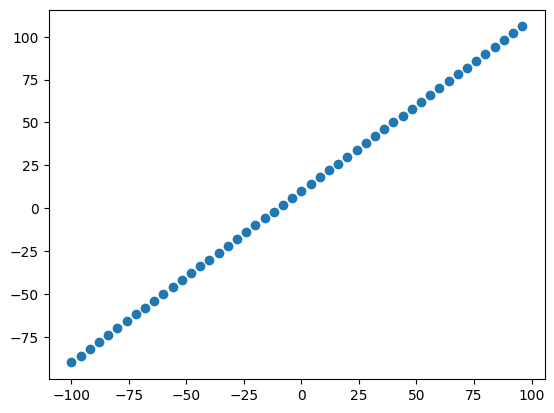

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which typically
constitutes 70-80% of the total available data.
* **Validation set** - the model is fine-tuned on this data, typically representing 10-15% of the available data.
* **Test set** - the model is evaluated on this data to assess what it has learned; this set typically accounts for 10-15% of the total available data.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

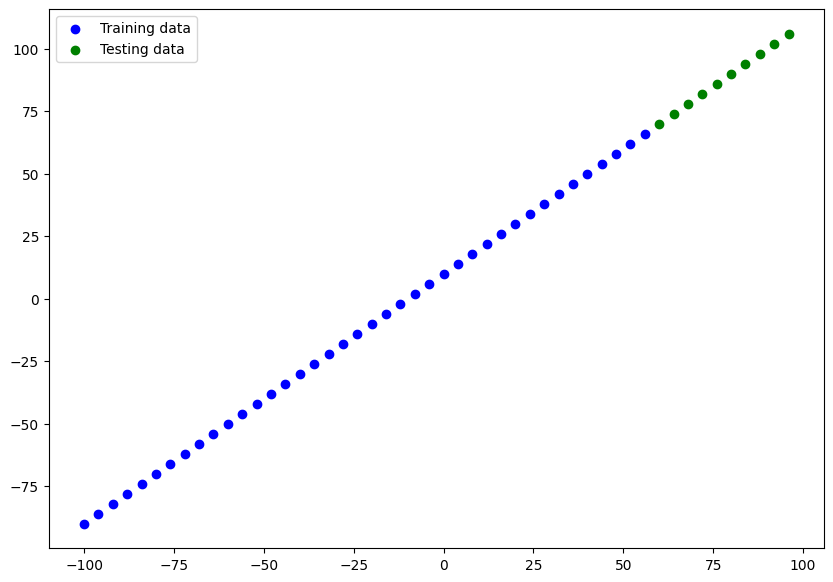

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # Fit
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

### Visualizing the model

In [ ]:

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer1"),
    tf.keras.layers.Dense(10, name="input_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

* Total params - total number of parameters in the model.
* Trainable parameters -these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).



In [ ]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 input_layer2 (Dense)        (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


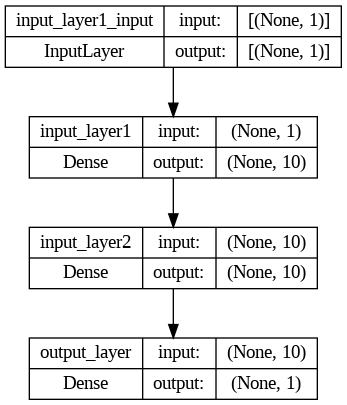

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualize our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true`
versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[6.3725724],
       [6.7341776],
       [7.0957828],
       [7.4573874],
       [7.818992 ],
       [8.180597 ],
       [8.542203 ],
       [8.903808 ],
       [9.265413 ],
       [9.627018 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [ ]:
 # Let's create a plotting function
def plot_predictions(training_data=X_train,
                      training_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_pred):
   """
   Plots training data, test data and compares predictions to ground truth labels.
   """

   plt.figure(figsize=(10, 7))
   # Plot training data in blue
   plt.scatter(training_data, training_labels, c='b', label="Training data")
   # Plot testing data in green
   plt.scatter(test_data,test_labels, c='g', label="Testing data")
   #Plot model's predictions in red
   plt.scatter(test_data, predictions, c='r', label="Predictions")
   # Show the legend
   plt.legend();

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]


len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, name="input_layer0"),
    tf.keras.layers.Dense(15, name="input_layer1"),
    tf.keras.layers.Dense(13, name="input_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# Compile
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# fit
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=190, verbose=1)

Epoch 1/190
2/2 [==============================] - 1s 13ms/step - loss: 56.3138 - mae: 56.3138
Epoch 2/190
2/2 [==============================] - 0s 9ms/step - loss: 51.3986 - mae: 51.3986
Epoch 3/190
2/2 [==============================] - 0s 7ms/step - loss: 47.0710 - mae: 47.0710
Epoch 4/190
2/2 [==============================] - 0s 13ms/step - loss: 42.3266 - mae: 42.3266
Epoch 5/190
2/2 [==============================] - 0s 8ms/step - loss: 37.5860 - mae: 37.5860
Epoch 6/190
2/2 [==============================] - 0s 10ms/step - loss: 32.8743 - mae: 32.8743
Epoch 7/190
2/2 [==============================] - 0s 9ms/step - loss: 27.8659 - mae: 27.8659
Epoch 8/190
2/2 [==============================] - 0s 8ms/step - loss: 22.9987 - mae: 22.9987
Epoch 9/190
2/2 [==============================] - 0s 8ms/step - loss: 18.5348 - mae: 18.5348
Epoch 10/190
2/2 [==============================] - 0s 8ms/step - loss: 13.7299 - mae: 13.7299
Epoch 11/190
2/2 [==============================] - 0s 9

In [ ]:
# Make some predictions
y_pred = model2.predict(X_test)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[ 69.896545],
       [ 73.9184  ],
       [ 77.940254],
       [ 81.962105],
       [ 85.983955],
       [ 90.00581 ],
       [ 94.02767 ],
       [ 98.049515],
       [102.07137 ],
       [106.09323 ]], dtype=float32)

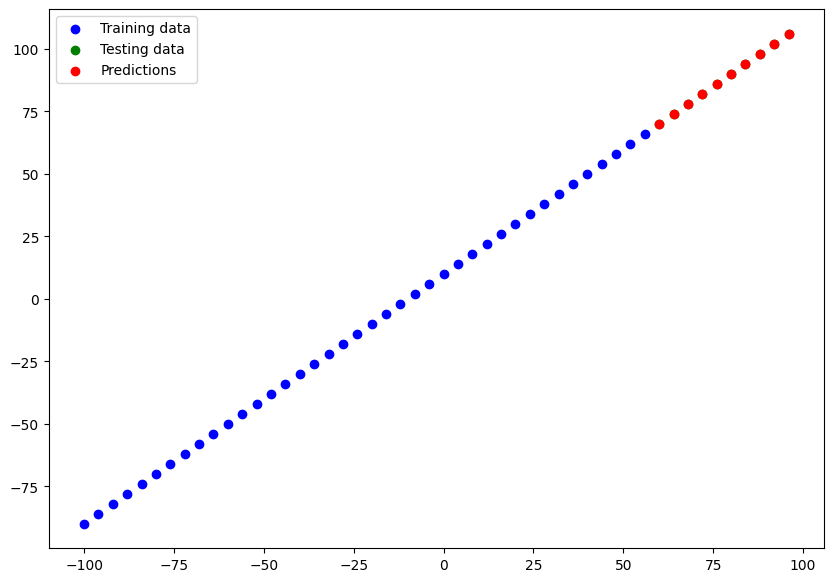

In [ ]:
plot_predictions(training_data=X_train,
                 training_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors."

In [ ]:
# Evaluate the model on the test
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 151ms/step - loss: 0.0546 - mae: 0.0546


[0.05463409423828125, 0.05463409423828125]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                              y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.103455 , 14.865277 , 12.435847 , 10.815158 , 10.003209 ,
       10.001163 , 10.811069 , 12.4297085, 14.857099 , 18.093231 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.896545],
       [ 73.9184  ],
       [ 77.940254],
       [ 81.962105],
       [ 85.983955],
       [ 90.00581 ],
       [ 94.02767 ],
       [ 98.049515],
       [102.07137 ],
       [106.09323 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [ ]:
# Let's get rid of that one dimension (10, 1) --> (10,)
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.896545,  73.9184  ,  77.940254,  81.962105,  85.983955,
        90.00581 ,  94.02767 ,  98.049515, 102.07137 , 106.09323 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.054634094>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.0039661257>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 31.4745 - mae: 31.4745
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 8.8385 - mae: 8.8385
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7020 - mae: 9.7020
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 11.8468 - mae: 11.8468
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.9136 - mae: 10.9136
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 10.0858 - mae: 10.0858
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1176 - mae: 9.1176
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0967 - mae: 9.0967
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 15.0915 - mae: 15.0915
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5680 - mae: 7.5680
Epoch 11/100
2/2 [==============================] - 0s 6ms/step -

1/1 [==============================] - 0s 47ms/step


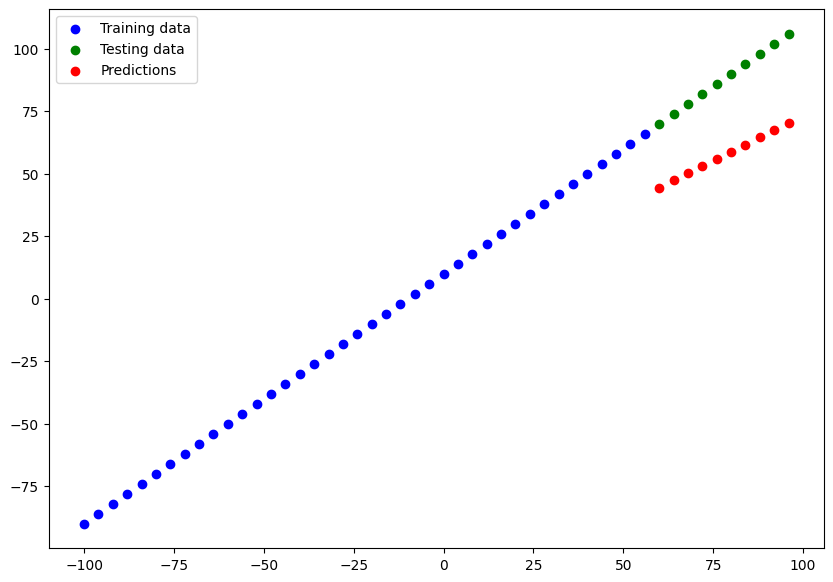

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.606339>,
 <tf.Tensor: shape=(), dtype=float32, numpy=947.16974>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
X_train.ndim, y_train.ndim

(1, 1)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 16.1120 - mse: 391.5409
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 28.6630 - mse: 1267.3724
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 21.4096 - mse: 678.0517
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.7383 - mse: 257.1273
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 18.6784 - mse: 473.1283
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3952 - mse: 125.4737
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3888 - mse: 140.6308
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0556 - mse: 197.2345
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 37.6683 - mse: 2185.2678
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.3094 - mse: 898.7174
Epoch 11/100
2/2 [=============================

1/1 [==============================] - 0s 51ms/step


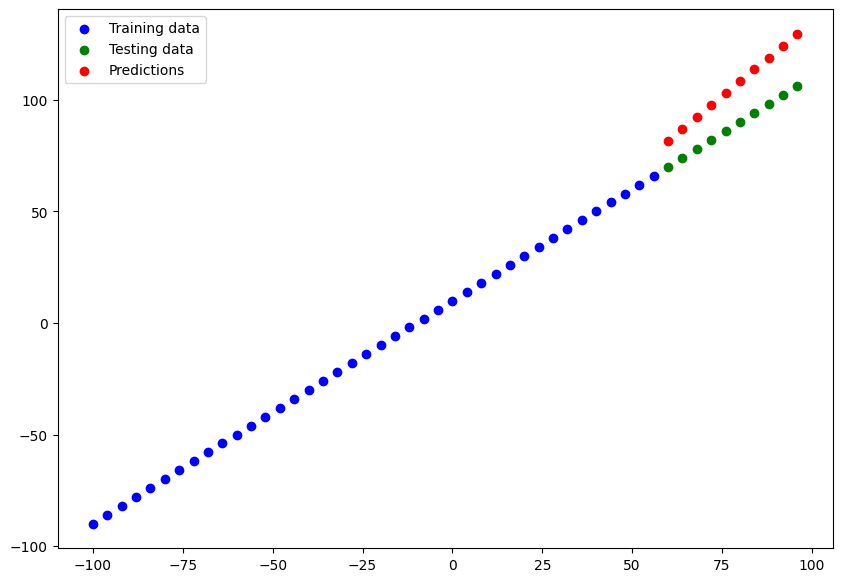

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=17.640299>,
 <tf.Tensor: shape=(), dtype=float32, numpy=325.75208>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_test, axis=-1), y_test, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 804ms/step - loss: 39.6057 - mae: 39.6057
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 171.5218 - mae: 171.5218
Epoch 3/500
1/1 [==============================] - 0s 21ms/step - loss: 80.5825 - mae: 80.5825
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 48.2140 - mae: 48.2140
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 38.8424 - mae: 38.8424
Epoch 6/500
1/1 [==============================] - 0s 21ms/step - loss: 81.8934 - mae: 81.8934
Epoch 7/500
1/1 [==============================] - 0s 20ms/step - loss: 68.5417 - mae: 68.5417
Epoch 8/500
1/1 [==============================] - 0s 16ms/step - loss: 26.3713 - mae: 26.3713
Epoch 9/500
1/1 [==============================] - 0s 20ms/step - loss: 107.2237 - mae: 107.2237
Epoch 10/500
1/1 [==============================] - 0s 18ms/step - loss: 78.5286 - mae: 78.5286
Epoch 11/500
1/1 [==========================

1/1 [==============================] - 0s 47ms/step


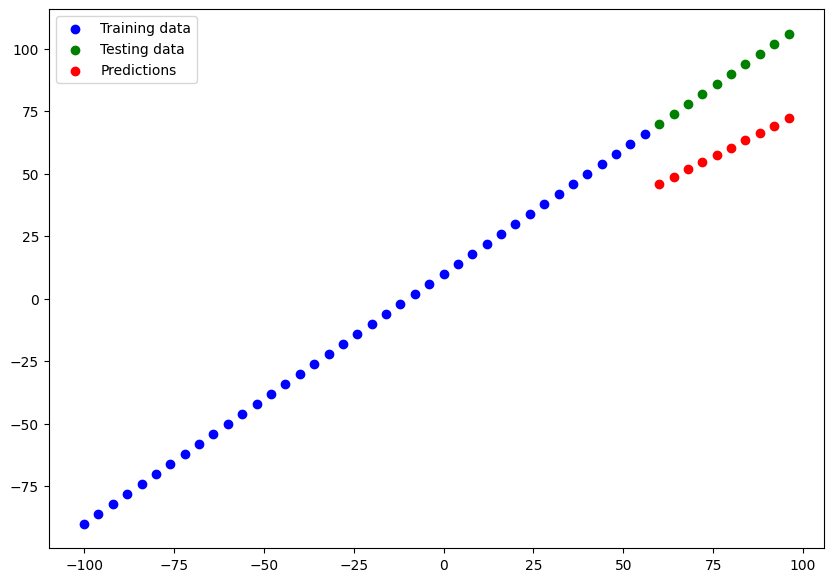

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=28.98114>,
 <tf.Tensor: shape=(), dtype=float32, numpy=849.6625>)

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.606339,947.169739
1,model_2,17.640299,325.752075
2,model_3,28.981140,849.662476


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

* **TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* **Weights & Biases** - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving out models

Saving our models allow us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formatns we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SaveModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 75ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 46ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file from Google Colab)

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code (see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab_Notebooks/tensorflow_coure

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks/tensorflow_coure

best_model_HDF5_format.h5


## A larger example

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [4]:
# Let's try one-hot encode our Dataframe so it's all numbers\
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [6]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=(0.008)),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13274.1836 - mae: 13274.1836
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13106.0879 - mae: 13106.0879
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12777.9941 - mae: 12777.9941
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12169.2676 - mae: 12169.2676
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11226.8613 - mae: 11226.8613
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 10092.4521 - mae: 10092.4521
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 9001.9990 - mae: 9001.9990
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 8153.9619 - mae: 8153.9619
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7667.4604 - mae: 7667.4604
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 7491.8921 - ma

In [10]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5731.3926 - mae: 5731.3926


[5731.392578125, 5731.392578125]

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

 1. Add an extra layer with more hidden units and use the Adam optimizer
 2. Same as above but train for longer (200 epochs)

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                                     optimizer=tf.keras.optimizers.Adam(),
                                     metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13298.0449 - mae: 13298.0449
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13165.1299 - mae: 13165.1299
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12866.1709 - mae: 12866.1709
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12250.7266 - mae: 12250.7266
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11177.6426 - mae: 11177.6426
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9723.8037 - mae: 9723.8037
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8319.5957 - mae: 8319.5957
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7565.2920 - mae: 7565.2920
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7418.0679 - mae: 7418.0679
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7396.1411 - mae:

In [13]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5084.3560 - mae: 5084.3560


[5084.35595703125, 5084.35595703125]

In [14]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5731.3926 - mae: 5731.3926


[5731.392578125, 5731.392578125]

In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13276.3438 - mae: 13276.3438
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13093.0273 - mae: 13093.0273
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12712.2539 - mae: 12712.2539
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 11986.0479 - mae: 11986.0479
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10818.0977 - mae: 10818.0977
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9392.3271 - mae: 9392.3271
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8127.2793 - mae: 8127.2793
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7548.3950 - mae: 7548.3950
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7454.6318 - mae: 7454.6318
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7434.7012 - mae:

In [16]:
# Evaluate our model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3498.5454 - mae: 3498.5454


[3498.54541015625, 3498.54541015625]

In [17]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5731.3926 - mae: 5731.3926


[5731.392578125, 5731.392578125]

Text(0.5, 0, 'epochs')

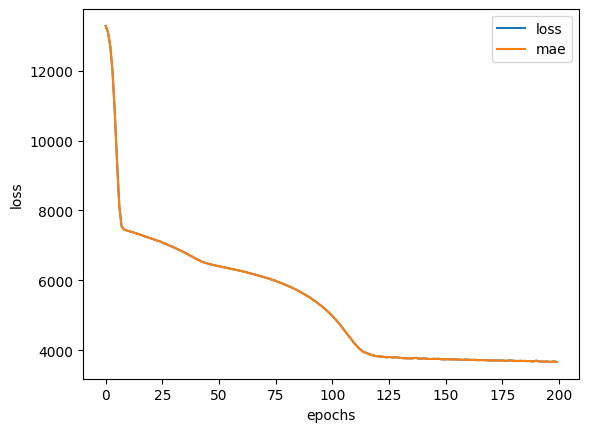

In [18]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


### How long should you train for?

It depends on the problem, but TensorFlow has a solution! It's called the **EarlyStopping Callback**.
It is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and see which performs better.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [30]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1.
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [31]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [35]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [36]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes

In [ ]:
# Build a neural network model to fit on our normalized data


<Axes: ylabel='Frequency'>

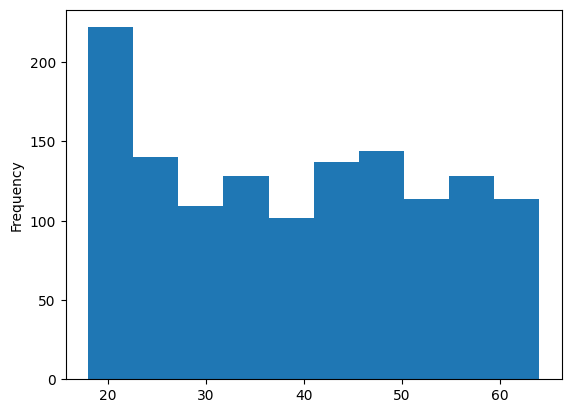

In [22]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

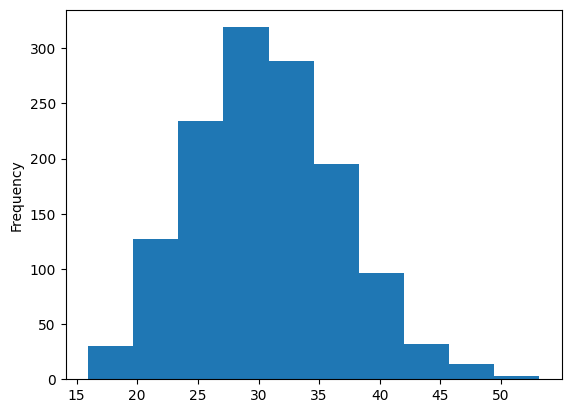

In [23]:
X["bmi"].plot(kind="hist")

In [24]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64